# Importing the chats

In [1]:
import re
import pandas as pd

In [2]:
f = open("WhatsApp Chat with Fazal L. D.txt", 'r', encoding='utf-8')
data = f.read()
#print(data)

# Data Preprocessing

In [3]:
hrsFormat24 = True
if(hrsFormat24):
    pattern = '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s'
else:
    pattern = ''

In [4]:
messages = re.split(pattern, data)[1:]
messages

['Messages and calls are end-to-end encrypted. No one outside of this chat, not even WhatsApp, can read or listen to them. Tap to learn more.\n',
 'Tirth Shah: <Media omitted>\n',
 'Fazal L. D: Thanks bro ♥️\n',
 'Tirth Shah: 😍\n',
 'Fazal L. D: 😇\n',
 'Fazal L. D: <Media omitted>\n',
 'Fazal L. D: <Media omitted>\n',
 'Tirth Shah: aa alag page che\n',
 'Fazal L. D: 3,5 kidha ne\n',
 'Fazal L. D: 4 moklu?\n',
 'Tirth Shah: <Media omitted>\n',
 'Fazal L. D: Aa juni book 6e, mare new hase\n',
 'Tirth Shah: ama 2019 na ques. che?\n',
 'Fazal L. D: Na\n',
 'Fazal L. D: 2020 6e\n',
 'Tirth Shah: ok kai nai economics ni defination valu page mokal ne\n',
 'Fazal L. D: Ha\n',
 'Tirth Shah: bija loko e definations api hay ne e page\n',
 'Fazal L. D: <Media omitted>\n',
 'Fazal L. D: Pdf mokal\n',
 'Tirth Shah: ok👍\n',
 'Tirth Shah: ha\n',
 'Tirth Shah: <Media omitted>\n',
 'Fazal L. D: 👍🏻\n',
 'Tirth Shah: lec. attend karvano?\n',
 'Fazal L. D: I66a nahi\n',
 'Fazal L. D: Tu?\n',
 'Tirth Shah: 

In [5]:
dates = re.findall(pattern, data)
dates

['03/05/22, 09:20 - ',
 '03/05/22, 09:20 - ',
 '03/05/22, 09:20 - ',
 '03/05/22, 12:08 - ',
 '03/05/22, 12:42 - ',
 '10/05/22, 15:15 - ',
 '10/05/22, 15:15 - ',
 '10/05/22, 15:15 - ',
 '10/05/22, 15:15 - ',
 '10/05/22, 15:16 - ',
 '10/05/22, 15:16 - ',
 '10/05/22, 15:16 - ',
 '10/05/22, 15:17 - ',
 '10/05/22, 15:17 - ',
 '10/05/22, 15:17 - ',
 '10/05/22, 15:18 - ',
 '10/05/22, 15:18 - ',
 '10/05/22, 15:18 - ',
 '10/05/22, 15:18 - ',
 '10/05/22, 15:18 - ',
 '10/05/22, 15:19 - ',
 '10/05/22, 15:19 - ',
 '10/05/22, 15:22 - ',
 '10/05/22, 15:22 - ',
 '18/05/22, 15:29 - ',
 '18/05/22, 15:29 - ',
 '18/05/22, 15:30 - ',
 '18/05/22, 15:30 - ',
 '18/05/22, 15:30 - ',
 '18/05/22, 15:30 - ',
 '18/05/22, 15:49 - ',
 '18/05/22, 15:50 - ',
 '18/05/22, 15:53 - ',
 '19/05/22, 14:52 - ',
 '19/05/22, 14:52 - ',
 '19/05/22, 16:17 - ',
 '19/05/22, 16:36 - ',
 '19/05/22, 16:36 - ',
 '20/05/22, 08:01 - ',
 '20/05/22, 08:02 - ',
 '20/05/22, 08:39 - ',
 '21/05/22, 19:32 - ',
 '21/05/22, 19:32 - ',
 '21/05/22,

In [6]:
#creating a dataframe of message and date with timestamp
df = pd.DataFrame({'user_message': messages, 'message_date': dates})

#converting dates into datetime format
df['message_date'] = pd.to_datetime(df['message_date'], format='%d/%m/%y, %H:%M - ')
df.rename(columns={'message_date': 'date'}, inplace=True)
df.head()

,user_message,date
0,Messages and calls are end-to-end encrypted. N...,2022-05-03 09:20:00
1,Tirth Shah: <Media omitted>\n,2022-05-03 09:20:00
2,Fazal L. D: Thanks bro ♥️\n,2022-05-03 09:20:00
3,Tirth Shah: 😍\n,2022-05-03 12:08:00
4,Fazal L. D: 😇\n,2022-05-03 12:42:00


In [7]:
df.shape

(6356, 2)

In [8]:
#code to seperate users and messages
users = []
messages = []
for message in df['user_message']:
    entry = re.split('([\w\W]+?):\s', message)
    if entry[1:]:
        users.append(entry[1])
        messages.append(entry[2])
    else:
        users.append('group_notifications')
        messages.append(entry[0])

df['user'] = users
df['message'] = messages
df.drop(columns=['user_message'], inplace=True)
df.head()

,date,user,message
0,2022-05-03 09:20:00,group_notifications,Messages and calls are end-to-end encrypted. N...
1,2022-05-03 09:20:00,Tirth Shah,<Media omitted>\n
2,2022-05-03 09:20:00,Fazal L. D,Thanks bro ♥️\n
3,2022-05-03 12:08:00,Tirth Shah,😍\n
4,2022-05-03 12:42:00,Fazal L. D,😇\n


In [9]:
#extracting year from date
df['year'] = df['date'].dt.year
df.head()

,date,user,message,year
0,2022-05-03 09:20:00,group_notifications,Messages and calls are end-to-end encrypted. N...,2022
1,2022-05-03 09:20:00,Tirth Shah,<Media omitted>\n,2022
2,2022-05-03 09:20:00,Fazal L. D,Thanks bro ♥️\n,2022
3,2022-05-03 12:08:00,Tirth Shah,😍\n,2022
4,2022-05-03 12:42:00,Fazal L. D,😇\n,2022


In [10]:
df['month'] = df['date'].dt.month_name()
df.head()

,date,user,message,year,month
0,2022-05-03 09:20:00,group_notifications,Messages and calls are end-to-end encrypted. N...,2022,May
1,2022-05-03 09:20:00,Tirth Shah,<Media omitted>\n,2022,May
2,2022-05-03 09:20:00,Fazal L. D,Thanks bro ♥️\n,2022,May
3,2022-05-03 12:08:00,Tirth Shah,😍\n,2022,May
4,2022-05-03 12:42:00,Fazal L. D,😇\n,2022,May


In [11]:
df['day'] = df['date'].dt.day
df['hour'] = df['date'].dt.hour
df['minute'] = df['date'].dt.minute
df.head()

,date,user,message,year,month,day,hour,minute
0,2022-05-03 09:20:00,group_notifications,Messages and calls are end-to-end encrypted. N...,2022,May,3,9,20
1,2022-05-03 09:20:00,Tirth Shah,<Media omitted>\n,2022,May,3,9,20
2,2022-05-03 09:20:00,Fazal L. D,Thanks bro ♥️\n,2022,May,3,9,20
3,2022-05-03 12:08:00,Tirth Shah,😍\n,2022,May,3,12,8
4,2022-05-03 12:42:00,Fazal L. D,😇\n,2022,May,3,12,42


In [12]:
num_messages = df['message'].shape[0]
print(num_messages)

6356


In [13]:
#fetch number of words
words = []
for message in df['message']:
    words.extend(message.split())
print(len(words))

#fetch number of media messages
num_media_messages = df[df['message'] == '<Media omitted>\n'].shape[0]
print(num_media_messages)


28354
650


In [14]:
x = df['user'].value_counts().head()

([0, 1, 2],
 [Text(0, 0, 'Fazal L. D'),
  Text(1, 0, 'Tirth Shah'),
  Text(2, 0, 'group_notifications')])

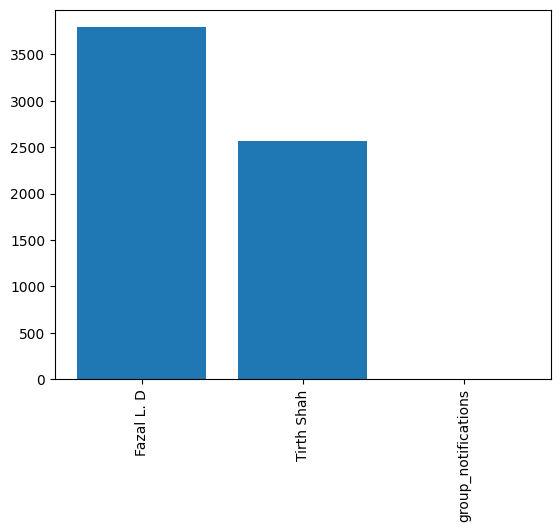

In [15]:
import matplotlib.pyplot as plt
name = x.index
count = x.values
plt.bar(name, count)
plt.xticks(rotation='vertical')

In [16]:

round((df['user'].value_counts()/df.shape[0])*100, 2).reset_index().rename(columns={'index': 'name', 'user': 'percent'})

,percent,count
0,Fazal L. D,59.66
1,Tirth Shah,40.32
2,group_notifications,0.02


In [18]:
#printing the most 25 used words
words = []
for message in df['message']:
    words.extend(message.split())
print(words)

['Messages', 'and', 'calls', 'are', 'end-to-end', 'encrypted.', 'No', 'one', 'outside', 'of', 'this', 'chat,', 'not', 'even', 'WhatsApp,', 'can', 'read', 'or', 'listen', 'to', 'them.', 'Tap', 'to', 'learn', 'more.', '<Media', 'omitted>', 'Thanks', 'bro', '♥️', '😍', '😇', '<Media', 'omitted>', '<Media', 'omitted>', 'aa', 'alag', 'page', 'che', '3,5', 'kidha', 'ne', '4', 'moklu?', '<Media', 'omitted>', 'Aa', 'juni', 'book', '6e,', 'mare', 'new', 'hase', 'ama', '2019', 'na', 'ques.', 'che?', 'Na', '2020', '6e', 'ok', 'kai', 'nai', 'economics', 'ni', 'defination', 'valu', 'page', 'mokal', 'ne', 'Ha', 'bija', 'loko', 'e', 'definations', 'api', 'hay', 'ne', 'e', 'page', '<Media', 'omitted>', 'Pdf', 'mokal', 'ok👍', 'ha', '<Media', 'omitted>', '👍🏻', 'lec.', 'attend', 'karvano?', 'I66a', 'nahi', 'Tu?', 'nope', 'Badha', 'na', 'j', 'keh', '6e', 'nice👍', '20', 'jana', '6e', 'lec', 'ma😳', 'B,', 'c', 'div', 'wala', 'y', '6e😂', 'Hu', '2', 'min', 'rahi', 'ne', 'nikdi', 'gayo', 'PEM', 'ma', 'nahi', 'viv

In [21]:
from collections import Counter
pd.DataFrame(Counter(words).most_common(25))

,0,1
0,<Media,650
1,omitted>,650
2,to,506
3,ma,415
4,6e,303
5,ne,296
6,ha,253
7,che,252
8,ae,235
9,na,224


## Removing the Group Messages

In [24]:
temp = df[df['user'] != 'group_notifications']

## Removing media omitted message

In [27]:
temp = temp[temp['message'] != '<Media omitted>\n']

## Removing the stopwords

In [34]:
f = open('stop_hinglish.txt', 'r')
stop_words = f.read()

words = []
for message in temp['message']:
    for word in message.lower().split():
        if word not in stop_words:
            words.append(word)

pd.DataFrame(Counter(words).most_common(25))

,0,1
0,6e,303
1,😂,201
2,thai,98
3,kale,97
4,barabar,92
5,=,91
6,nu,89
7,👍🏻,88
8,{,87
9,},84


## Analyzing emojis

In [35]:
! pip install emoji

     ---------------------------------------- 0.0/356.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/356.6 kB ? eta -:--:--
     - -------------------------------------- 10.2/356.6 kB ? eta -:--:--
     --- --------------------------------- 30.7/356.6 kB 435.7 kB/s eta 0:00:01
     --- --------------------------------- 30.7/356.6 kB 435.7 kB/s eta 0:00:01
     --- --------------------------------- 30.7/356.6 kB 435.7 kB/s eta 0:00:01
     --- --------------------------------- 30.7/356.6 kB 435.7 kB/s eta 0:00:01
     ---- -------------------------------- 41.0/356.6 kB 122.9 kB/s eta 0:00:03
     ------ ------------------------------ 61.4/356.6 kB 172.4 kB/s eta 0:00:02
     --------- --------------------------- 92.2/356.6 kB 227.6 kB/s eta 0:00:02
     ----------- ------------------------ 112.6/356.6 kB 252.2 kB/s eta 0:00:01
     ----------- ------------------------ 112.6/356.6 kB 252.2 kB/s eta 0:00:01
     ----------- ------------------------ 112.6/356.6 kB 25


[notice] A new release of pip is available: 23.0 -> 23.2
[notice] To update, run: C:\Users\Tirth\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [39]:
! pip uninstall emoji
! pip install emoji==1.7.0

^C



[notice] A new release of pip is available: 23.0 -> 23.2
[notice] To update, run: C:\Users\Tirth\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [44]:
import emoji
emojis = []
emojis.extend([match["emoji"] for message in df['message'] for match in emoji.emoji_list(message)])
pd.DataFrame(Counter(emojis).most_common(10))

,0,1
0,😂,283
1,👍🏻,156
2,🥲,72
3,👍,50
4,💯,49
5,🔥,48
6,🙂,42
7,🤩,33
8,🤣,29
9,🥳,19
